In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state= 42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [9]:
X_test.shape

(5160, 8)

In [10]:
X_valid.shape

(3870, 8)

In [11]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=[8]),
                                 keras.layers.Dense(30, activation="relu"),
                                 keras.layers.Dense(1)
                                 
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = "mean_squared_error",
              optimizer =keras.optimizers.SGD(lr=1e-3),
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
model_history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_valid, y_valid))

Epoch 1/50
363/363 [==============================] - 2s 3ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [15]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3514 - mae: 0.4190


In [16]:
model_history.history

{'loss': [1.8866394758224487,
  0.6577126979827881,
  0.5934185981750488,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.4853556454181671,
  0.47091808915138245,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.3979603350162506,
  0.394916296005249,
  0.392380952835083,
  0.38980719447135925,
  0.387410044670105,
  0.38507524132728577,
  0.38291803002357483,
  0.3808581829071045,
  0.3787591755390167,
  0.3769364356994629,
  0.37497687339782715,
  0.3729954957962036,
  0.3713502585887909,
  0.37013334035873413,
  0.36850523948669434,
  0.3672060966491699,
  0.36596885323524475,
  0.36465784907341003,
  0.36356648802757263,
  0.3624041974544525,
  0.36129018664360046,
  0.3601578176021576,
  0.3593330383300781,
  0.35798561573028564,
  0.3572618365287781,
  0.356404

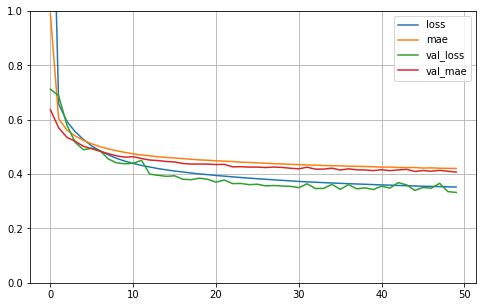

In [19]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
X_new = X_test[:5]

In [21]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:5])

[[0.6100354]
 [1.7973853]
 [3.8710501]
 [2.6701093]
 [2.823174 ]]
[0.477   0.458   5.00001 2.186   2.78   ]


In [22]:
del model

In [23]:
keras.backend.clear_session()

**Functional API**

In [26]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs = [output])

In [27]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']          

In [28]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [34]:
model_history = model.fit(X_train, y_train, epochs= 40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3662 - mae: 0.4330 - val_loss: 0.3596 - val_mae: 0.4205
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3650 - mae: 0.4320 - val_loss: 0.4055 - val_mae: 0.4274
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3642 - mae: 0.4320 - val_loss: 0.3878 - val_mae: 0.4213
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3633 - mae: 0.4308 - val_loss: 0.3550 - val_mae: 0.4212
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3623 - mae: 0.4299 - val_loss: 0.3476 - val_mae: 0.4187
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3611 - mae: 0.4297 - val_loss: 0.3716 - val_mae: 0.4185
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3605 - mae: 0.4287 - val_loss: 0.3586 - val_mae: 0.4188
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [35]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3467 - mae: 0.4133


In [36]:
model_history.history

{'loss': [0.36622288823127747,
  0.36500006914138794,
  0.364217609167099,
  0.3632681369781494,
  0.3623109459877014,
  0.3611108064651489,
  0.3604705035686493,
  0.35956382751464844,
  0.3585939109325409,
  0.35758906602859497,
  0.3572273254394531,
  0.35606545209884644,
  0.3554365634918213,
  0.3546859323978424,
  0.35383138060569763,
  0.3531961143016815,
  0.35245347023010254,
  0.35193929076194763,
  0.3509945273399353,
  0.35050055384635925,
  0.34995993971824646,
  0.3491249978542328,
  0.34882646799087524,
  0.34799689054489136,
  0.3473166823387146,
  0.34692952036857605,
  0.34655922651290894,
  0.34590670466423035,
  0.34544289112091064,
  0.34462130069732666,
  0.34414464235305786,
  0.34351846575737,
  0.34352627396583557,
  0.34267657995224,
  0.34211260080337524,
  0.3419322371482849,
  0.34131118655204773,
  0.3408554196357727,
  0.34040090441703796,
  0.33985742926597595],
 'mae': [0.43299633264541626,
  0.43199798464775085,
  0.4320273697376251,
  0.43084102869033

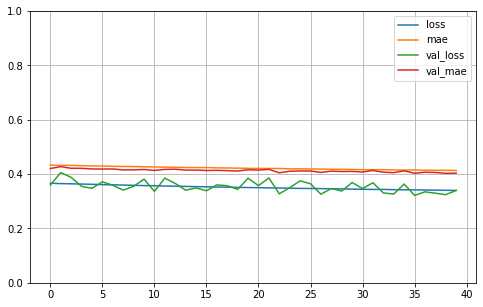

In [37]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()